In [1]:
# import data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
credit_card_data=pd.read_csv('/content/creditcard.csv');
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# first 5 rows of the dataset
credit_card_data.head()

credit_card_data.tail()

# dataset informations
credit_card_data.info()

# checking the number of missing values in each column
credit_card_data.isnull().sum()

# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0    284315
1       492
Name: Class, dtype: int64

In [3]:
# This Dataset is highly unblanced

# 0 --> Normal Transaction

# 1 --> fraudulent transaction

In [4]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

print(legit.shape)
print(fraud.shape)

# statistical measures of the data
legit.Amount.describe()

fraud.Amount.describe()

# compare the values for both transactions
credit_card_data.groupby('Class').mean()


# Under-Sampling

# Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

# Number of Fraudulent Transactions --> 492

legit_sample = legit.sample(n=492)

new_dataset = pd.concat([legit_sample, fraud], axis=0)

new_dataset.head()

new_dataset.tail()

new_dataset['Class'].value_counts()

new_dataset.groupby('Class').mean()

(284315, 31)
(492, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93506.264228,0.116564,-0.044909,0.066366,-0.007263,-0.059522,0.108375,0.047676,-0.020002,0.076736,...,0.010122,0.004026,0.023275,-0.022670,0.036445,-0.027488,-0.013926,0.004008,0.014940,103.860488
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [5]:
# Splitting the data into Features & Targets

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

print(X)

print(Y)

# Split the data into Training data & Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)


            Time        V1        V2        V3        V4        V5        V6  \
50822    44665.0 -0.417238  0.849833  1.461109  0.902535  0.172231 -0.381301   
270190  163954.0 -0.077326  0.682206  0.512321 -0.681911  0.651269  0.158086   
114198   73378.0  1.118218  0.086567  0.203965  1.181200 -0.423682 -0.968411   
66895    52267.0  1.259254 -0.026894  0.393371  0.780096 -0.422832 -0.328584   
48934    43844.0  1.085520 -0.168681  0.868271  1.184823 -0.658303  0.210361   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [6]:
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier

# Point Anomaly Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X_train)

# Anomalies are denoted by -1, normal points are denoted by 1
y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)

# Print the anomaly prediction results
print("Anomaly prediction for training data: ", y_pred_train)
print("Anomaly prediction for test data: ", y_pred_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Model Evaluation
X_train_prediction_dt = dt_model.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)

print('Accuracy on Training data (Decision Tree): ', training_data_accuracy_dt)

X_test_prediction_dt = dt_model.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)

print('Accuracy on Test data (Decision Tree): ', test_data_accuracy_dt)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomaly prediction for training data:  [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


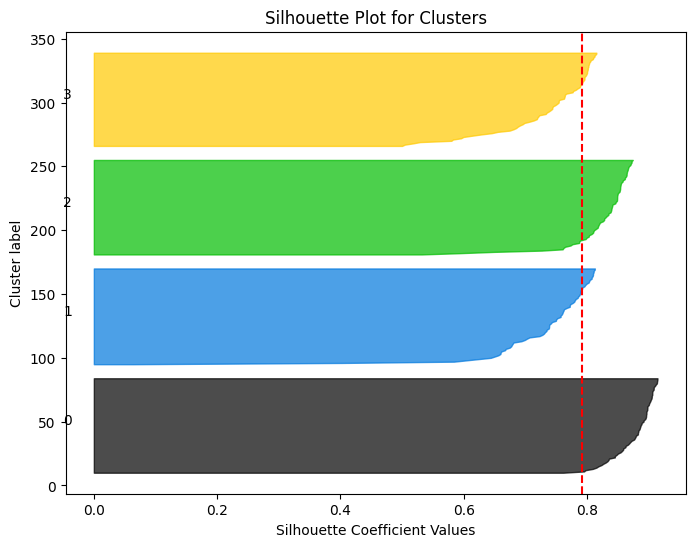

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a sample dataset (you should replace this with your own data)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Apply K-Means clustering (you should replace this with your clustering algorithm)
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)

# Calculate the silhouette scores for each sample
silhouette_values = silhouette_samples(X, labels)

# Calculate the overall silhouette score for the entire dataset
average_silhouette_score = silhouette_score(X, labels)

# Create a bar plot for the silhouette scores of each sample
plt.figure(figsize=(8, 6))
n_clusters = len(np.unique(labels))
y_lower = 10  # Initialize the lower bound for the first cluster

for i in range(n_clusters):
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()

    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # Add 10 for the next plot

plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster label")

# The vertical line represents the average silhouette score
plt.axvline(x=average_silhouette_score, color="red", linestyle="--")

plt.show()


<ipython-input-8-a9e54d8f21ae>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(legit[feature], hist=False, rug=True, label='Normal')
<ipython-input-8-a9e54d8f21ae>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud[feature], hist=False, rug=True, label='Fraud')
<ipython-

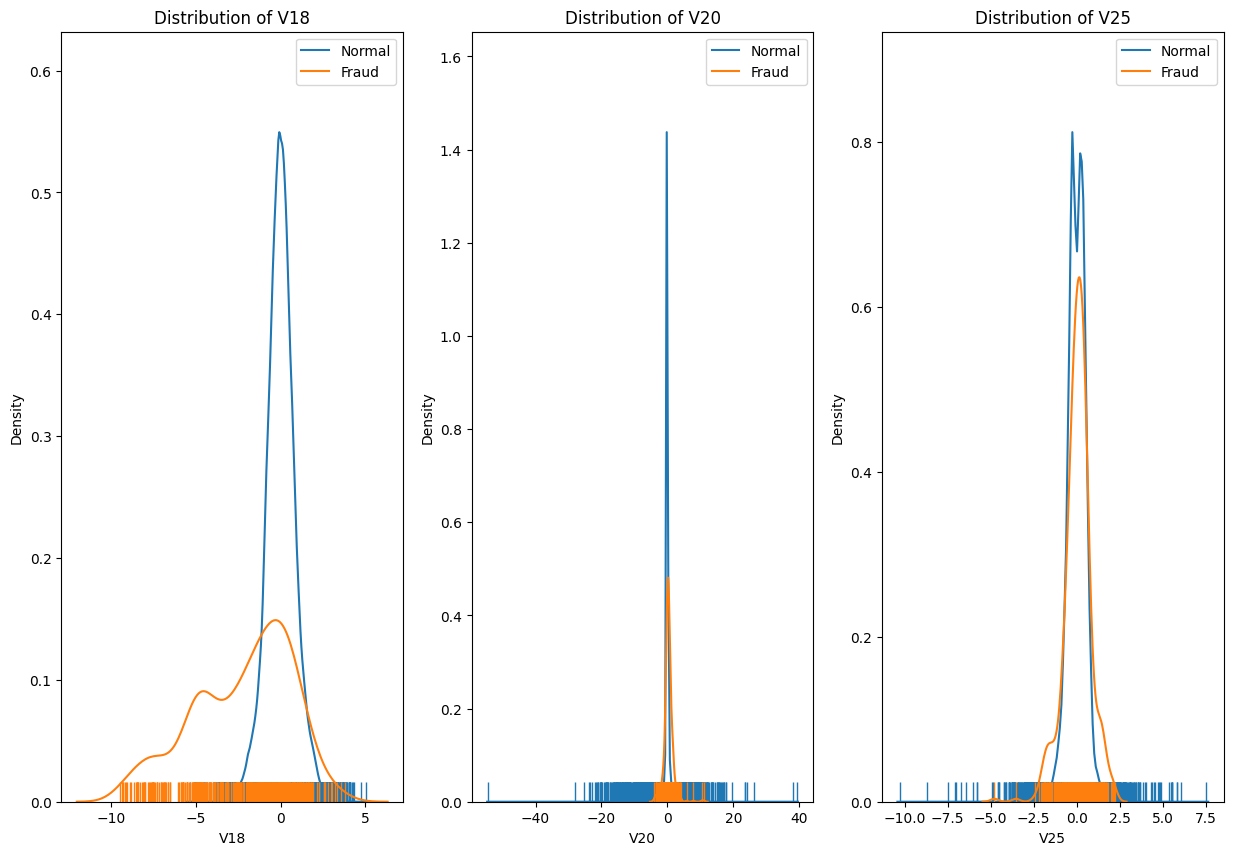

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['V18', 'V20', 'V25']

# Create a figure
plt.figure(figsize=(15, 10))

# For each feature
for i, feature in enumerate(features):
    # Create a subplot for each feature
    plt.subplot(1, 3, i+1)

    # Plot the distribution of the feature for normal transactions
    sns.distplot(legit[feature], hist=False, rug=True, label='Normal')

    # Plot the distribution of the feature for fraud transactions
    sns.distplot(fraud[feature], hist=False, rug=True, label='Fraud')

    # Set the title of the subplot
    plt.title('Distribution of {}'.format(feature))

    # Show the legend
    plt.legend()

# Show the plot
plt.show()


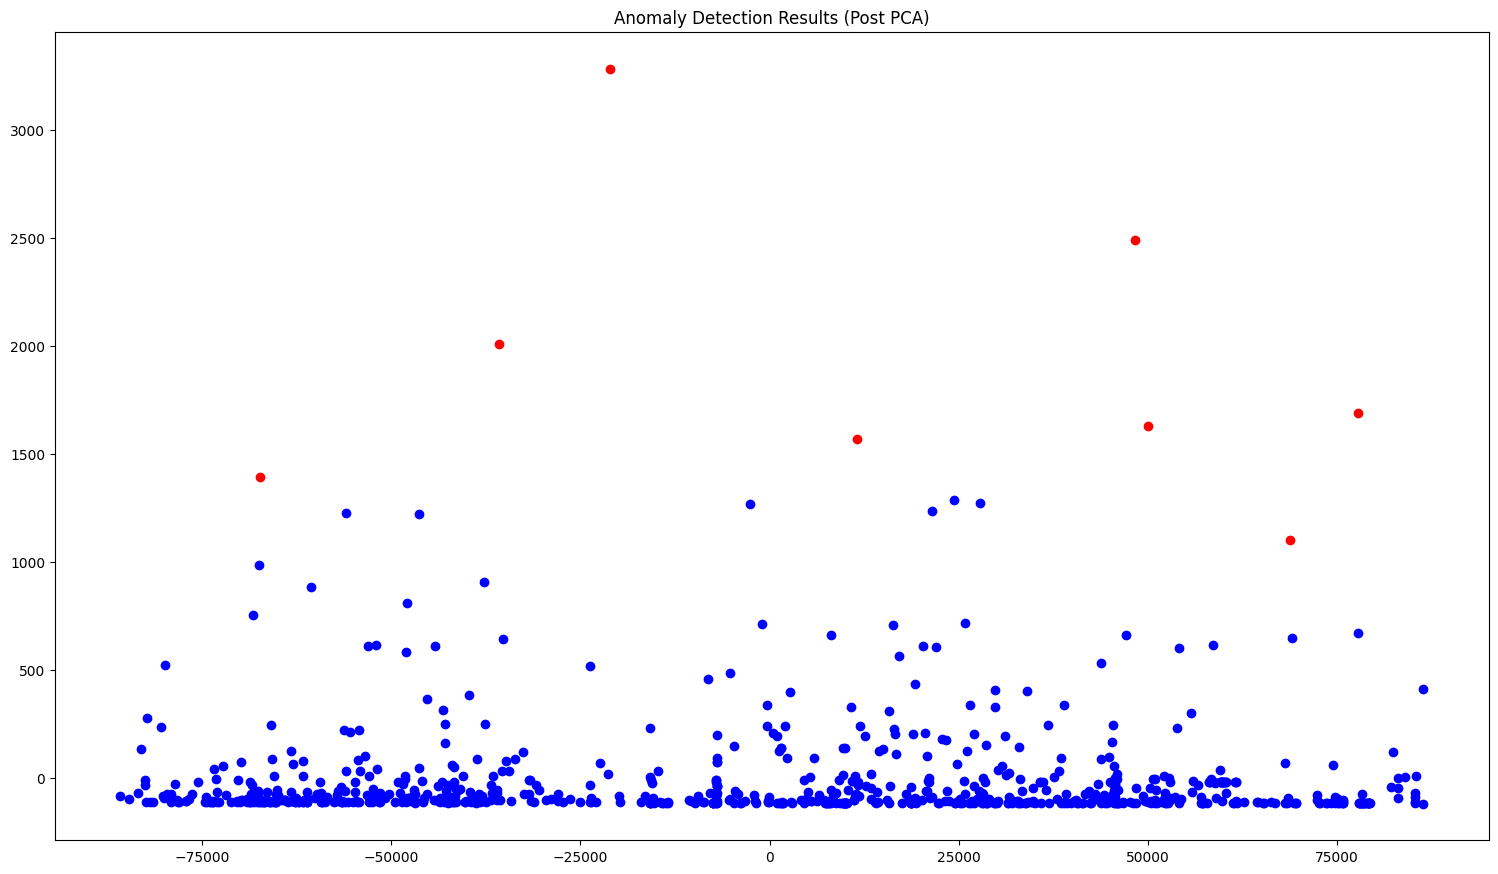

In [10]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Now you can use PCA and IsolationForest in your code

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)

# Fit the model and predict anomalies
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(X_pca_train)
y_pred_train = iso_forest.predict(X_pca_train)

# Create a DataFrame for the reduced data
X_pca_df = pd.DataFrame(data=X_pca_train, columns=['PC1', 'PC2'])

# Add the anomaly labels to the DataFrame
X_pca_df['Anomaly'] = y_pred_train

# Plot the normal and anomaly points
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_df.loc[X_pca_df['Anomaly'] == 1, 'PC1'], X_pca_df.loc[X_pca_df['Anomaly'] == 1, 'PC2'], color='blue', label='Normal')
plt.scatter(X_pca_df.loc[X_pca_df['Anomaly'] == -1, 'PC1'], X_pca_df.loc[X_pca_df['Anomaly'] == -1, 'PC2'], color='red', label='Anomaly')

# Set the title and size
plt.title('Anomaly Detection Results (Post PCA)')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# Show the plot
plt.show()
